In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
import json


# Question : The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

In [10]:
file_data = pd.read_csv('Datasets/zomato.csv',encoding='iso-8859-1')

In [11]:
df = file_data.copy()
df = df[df['Country Code'] == 1]
df['City'].replace(['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad'],'Delhi NCR',inplace=True)
Delhi_NCR = df[df['City'] == 'Delhi NCR']['City'].count()
India_count = df[ df['City'] != 'Delhi NCR' ]['City'].count()

# Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

### Here we have in first changed the names of 'Faridabad','Noida','New Delhi','Gurgaon','Ghaziabad' to 'Delhi NCR'. Then the graph is plotted by making count of restaurants in 'Delhi NCR' and 'India' (Rest of India)

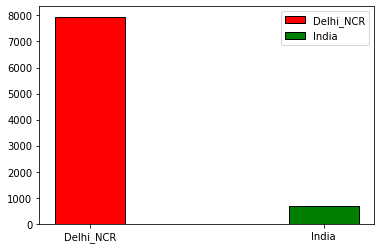

In [19]:
x = ['Delhi_NCR','India']
y = [Delhi_NCR,India_count]
z = ['red','green']
for i in range(2):
    plt.bar(x[i],y[i],width=0.3,color=z[i],edgecolor=['black'],
        label = x[i])
plt.legend()
plt.savefig('fig1.png',orientation='portrait',dpi=100,bbox_inches='tight')
plt.show()

# Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

### First we have made 2 sets namely set1 for the Cuisines that are in 'Delhi NCR' and set2 for all the Cuisines that are present in 'Rest of India' Then to find out the Cuisines ehich are not served in 'Delhi NCR' but in the rest of India .... set2-set1 is done......Then we have made api call in zomato to find all cuisines that are served in Delhi to check out the valdity of our answer

In [236]:
d = df[ df.City == 'Delhi NCR'].Cuisines.str.split(', ')
set1 = set().union(*d)
i = df[ df.City != 'Delhi NCR' ].Cuisines.str.split(', ')
set2 = set().union(*i)
set2-set1

{'BBQ', 'Cajun', 'German', 'Malwani'}

In [237]:
header={"user-key":"f3514a443a505717a807639f51a09369" , 'Accept': 'application/json'}
response=requests.get('https://developers.zomato.com/api/v2.1/cuisines',headers=header,
                      params={'city_id':1})
python_data = response.json()

# The total cuisnes that are in delhi
# This is made by API call with city-id 1
d = set()
for i in python_data['cuisines']:
    d.add(i['cuisine']['cuisine_name'])
d

{'Afghan',
 'African',
 'American',
 'Andhra',
 'Arabian',
 'Armenian',
 'Asian',
 'Assamese',
 'Awadhi',
 'BBQ',
 'Bakery',
 'Bar Food',
 'Belgian',
 'Bengali',
 'Beverages',
 'Bihari',
 'Biryani',
 'Brazilian',
 'British',
 'Bubble Tea',
 'Burger',
 'Burmese',
 'Cafe',
 'Cantonese',
 'Charcoal Chicken',
 'Chettinad',
 'Chinese',
 'Coffee',
 'Continental',
 'Cuisine Varies',
 'Desserts',
 'Ethiopian',
 'European',
 'Fast Food',
 'Finger Food',
 'French',
 'Frozen Yogurt',
 'Garhwali',
 'Goan',
 'Greek',
 'Grocery',
 'Gujarati',
 'Healthy Food',
 'Hot dogs',
 'Hyderabadi',
 'Ice Cream',
 'Indonesian',
 'Iranian',
 'Israeli',
 'Italian',
 'Japanese',
 'Juices',
 'Kashmiri',
 'Kebab',
 'Kerala',
 'Korean',
 'Lebanese',
 'Lucknowi',
 'Maharashtrian',
 'Malaysian',
 'Malwani',
 'Mangalorean',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Mishti',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mongolian',
 'Moroccan',
 'Mughlai',
 'Naga',
 'Nepalese',
 'North Eastern',
 'North Indian',
 'Odi

In [238]:
for i in set2-set1:
    print(i,i in d)

BBQ True
German False
Malwani True
Cajun False


In [239]:
print(set2-set1)

{'BBQ', 'German', 'Malwani', 'Cajun'}


### The answer from our dataset is {'BBQ', 'Cajun', 'German', 'Malwani'} i.e these Cuisines are served in Rest of india but not in delhi ...... While fro our api {'BBQ ','Malwani'} are served in delhi

In [240]:
for i in (set2-set1):
    print(i,i in d)

BBQ True
German False
Malwani True
Cajun False


# Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

### here i have made a dictionary for all the cuisines and then i have sorted them on the basis of their total number(values) ...Then plotted the bar bar graph for the same


In [21]:
df = file_data.copy()
df['City'].replace(['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad'],'Delhi NCR',inplace=True)
df = df[ df['Country Code'] == 1 ]
delhi = df[ df['City'] == 'Delhi NCR']
india = df[df['City'] != 'Delhi NCR']
d = {}
i = {}
for b in delhi.Cuisines:
    x = b.split(', ')
    for j in x:
        d[j] = d.get(j,0) + 1

for a in india.Cuisines:
    x = a.split(', ')
    for j in x:
        i[j] = i.get(j,0) + 1
        
d = sorted(d.items(),key = lambda x:x[1],reverse=True)
d = dict(d[:10])
xd = d.keys()
yd = d.values()
i = sorted(i.items(),key = lambda x:x[1],reverse=True)
i = dict(i[:10])
xi = i.keys()
yi = i.values()

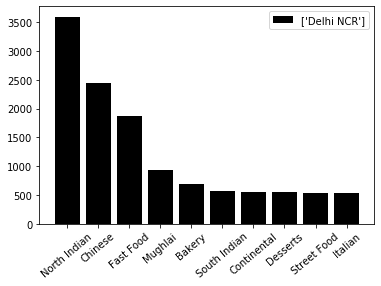

In [22]:
plt.bar(xd,yd,color='black',label=['Delhi NCR'])
plt.legend()

plt.xticks(rotation=40)
plt.savefig('fig1.png',orientation='portrait',dpi=100,bbox_inches='tight')
plt.show()

# Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

### Below given graph is for Cuisines that are served in the Rest of india

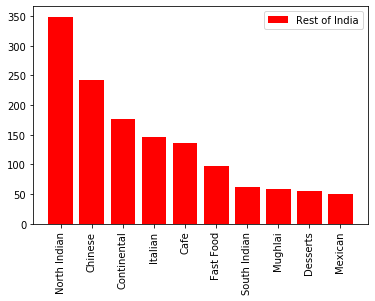

In [23]:
import matplotlib.pyplot as plt
plt.clf()
plt.bar(xi,yi,color='red',label='Rest of India')
plt.legend()
plt.xticks(rotation=90)
plt.savefig('fig1.png',orientation='portrait',dpi=100,bbox_inches='tight')
plt.show()

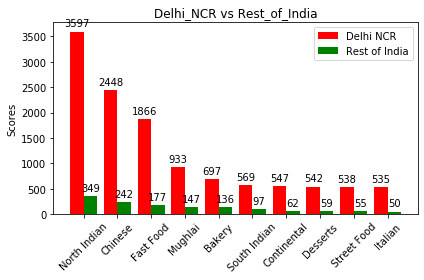

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(d))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, yd, width, label='Delhi NCR',color='red')
rects2 = ax.bar(x + width/2, yi, width, label='Rest of India',color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Delhi_NCR vs Rest_of_India')
ax.set_xticks(x)
ax.set_xticklabels(xd, rotation=45)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('fig1.png',orientation='portrait',dpi=100,bbox_inches='tight')
plt.show()

### Gievn above graph gives us the direct comparision between the Cuisines that are in both.

### From it we can say that the trend of Cuisines is same in both although their number vary but the top Cuisines observe the same trend in both

### Like Northindian is top in both and then further the same trend is seen ... as i mentioned earlier that though their number vary